**HEART DISEASE PREDICTION USING DECISION TREE CLASSIFIER BY SIDDHARTH KONNAR**

In [232]:
#to get rid of warnings
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
#loading of data
data_frame = pd.read_csv("/content/drive/MyDrive/Hackathon AIML/heart.csv")

**ANALYSING THE DATA IN THE DATASET**

In [234]:
data_frame.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [235]:
data_frame.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [236]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [237]:
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [238]:
data_frame.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [239]:
#there exists no null values in the dataset.
#not required to remove them.

In [240]:
#checking the count of males and females
data_frame["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [241]:
#segregating the sex binary values into male and female
data_frame["sex"] = data_frame.sex.apply(lambda  x:'male' if x==1 else 'female')

In [242]:
data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [243]:
#dropping column ca
data_frame = data_frame.drop('ca', 1)

In [244]:
#renaming the columns into better names
data_frame.rename(columns = {'age':'Age','sex':'Sex','cp':'ChestPainType',
                     'trestbps':'RestingBP','chol':'Cholesterol','fbs':'FastingBS','restecg':'RestingECG'
                    ,'thalach':'MaxHR','exang':'ExecrciseAngina','oldpeak':'Oldpeak','slope':'ST_Slope','target':'HeartDisease'}, inplace = True)
data_frame.tail(n=20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExecrciseAngina,Oldpeak,ST_Slope,thal,HeartDisease
1005,55,female,0,128,205,0,2,130,1,2.0,1,3,0
1006,58,male,2,140,211,1,0,165,0,0.0,2,2,1
1007,56,male,3,120,193,0,0,162,0,1.9,1,3,1
1008,42,male,1,120,295,0,1,162,0,0.0,2,2,1
1009,40,male,0,152,223,0,1,181,0,0.0,2,3,0
1010,51,male,0,140,299,0,1,173,1,1.6,2,3,0
1011,45,male,1,128,308,0,0,170,0,0.0,2,2,1
1012,48,male,1,110,229,0,1,168,0,1.0,0,3,0
1013,58,male,0,114,318,0,2,140,0,4.4,0,1,0
1014,44,female,2,108,141,0,1,175,0,0.6,1,2,1


In [245]:
#classifying the target result as Normal or HeartDisease ( 0 or 1)
data_frame["HeartDisease"] = data_frame.HeartDisease.apply(lambda  x:'HeartDisease' if x==1 else 'Normal')

In [246]:
#CHEST PAIN TYPES
#type 1 --> typical angina
#type 2 --> atypical angina
#type 3 --> non-anginal pain
#type 4 --> asymptomatic

#RESTING ECG TYPES
#type 1 --> normal
#type 2 --> ST-T wave abnormality
#type 3 --> left ventricular hypertrophy

#ST_SLOPE TYPES
#type1 --> upsloping
#type2 --> flat
#type3 --> downsloping

data_frame['ChestPainType'][data_frame['ChestPainType'] == 0] = 'type1'
data_frame['ChestPainType'][data_frame['ChestPainType'] == 1] = 'type2'
data_frame['ChestPainType'][data_frame['ChestPainType'] == 2] = 'type3'
data_frame['ChestPainType'][data_frame['ChestPainType'] == 3] = 'type4'

data_frame['RestingECG'][data_frame['RestingECG'] == 0] = 'type1'
data_frame['RestingECG'][data_frame['RestingECG'] == 1] = 'type2'
data_frame['RestingECG'][data_frame['RestingECG'] == 2] = 'type3'

data_frame['ST_Slope'][data_frame['ST_Slope'] == 1] = 'type1'
data_frame['ST_Slope'][data_frame['ST_Slope'] == 2] = 'type2'
data_frame['ST_Slope'][data_frame['ST_Slope'] == 3] = 'type3'


data_frame.tail(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExecrciseAngina,Oldpeak,ST_Slope,thal,HeartDisease
1015,58,male,type1,128,216,0,type1,131,1,2.2,type1,3,Normal
1016,65,male,type4,138,282,1,type1,174,0,1.4,type1,2,Normal
1017,53,male,type1,123,282,0,type2,95,1,2.0,type1,3,Normal
1018,41,male,type1,110,172,0,type1,158,0,0.0,type2,3,Normal
1019,47,male,type1,112,204,0,type2,143,0,0.1,type2,2,HeartDisease
1020,59,male,type2,140,221,0,type2,164,1,0.0,type2,2,HeartDisease
1021,60,male,type1,125,258,0,type1,141,1,2.8,type1,3,Normal
1022,47,male,type1,110,275,0,type1,118,1,1.0,type1,2,Normal
1023,50,female,type1,110,254,0,type1,159,0,0.0,type2,2,HeartDisease
1024,54,male,type1,120,188,0,type2,113,0,1.4,type1,3,Normal


**DATA VISULAISATION**

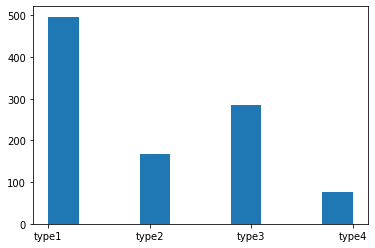

In [247]:
#plotting histogram with chestpaintype
plt.hist(data_frame['ChestPainType'])
plt.show()

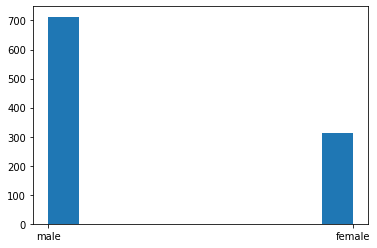

In [248]:
#plotting histogram with sex
plt.hist(data_frame['Sex'])
plt.show()

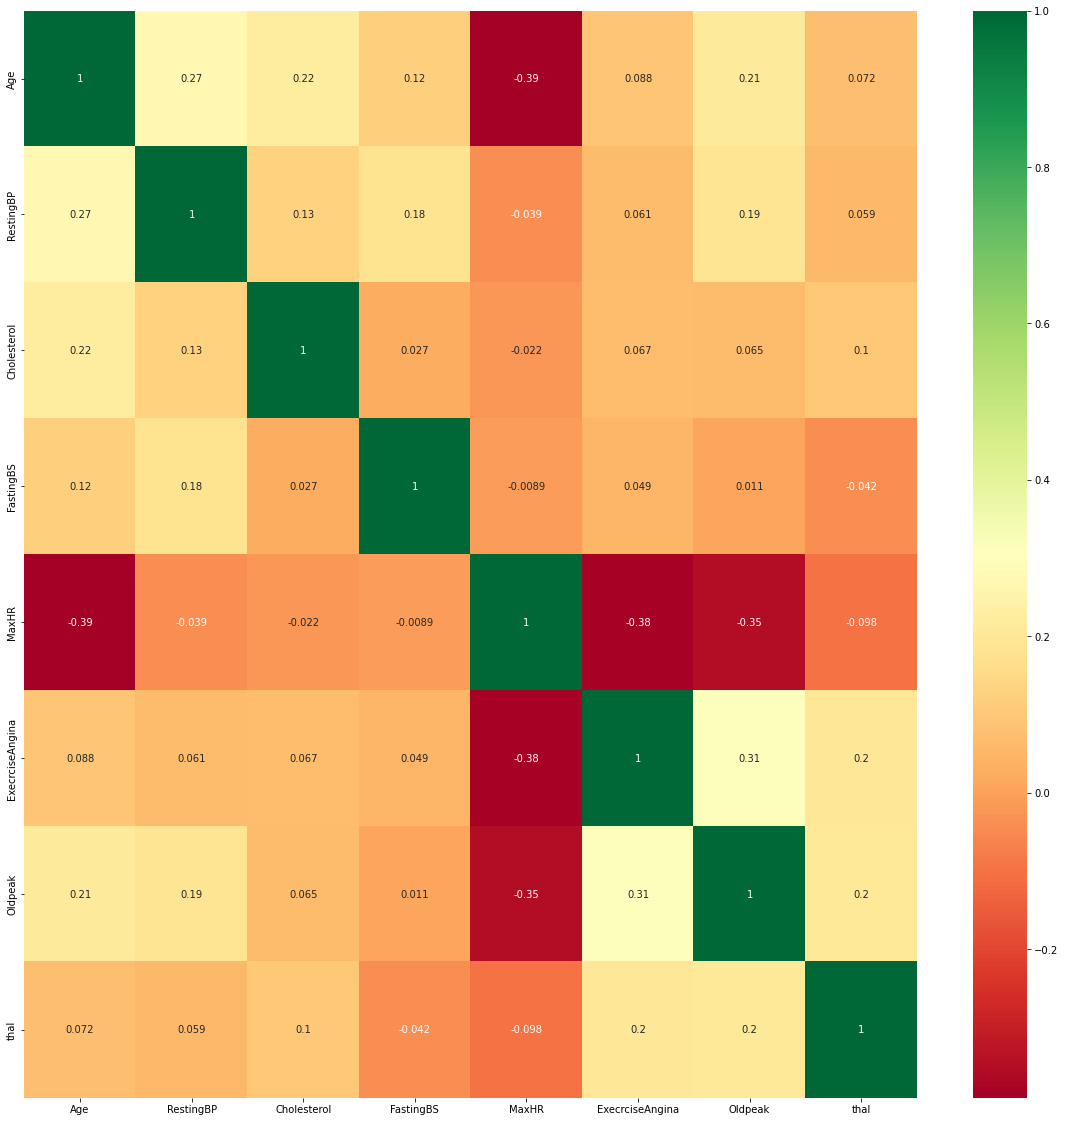

In [249]:
#get correlations of each features in dataset
corrmatrix = data_frame.corr()
top_corr_features = corrmatrix.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_frame[top_corr_features].corr(),annot=True,cmap="RdYlGn")

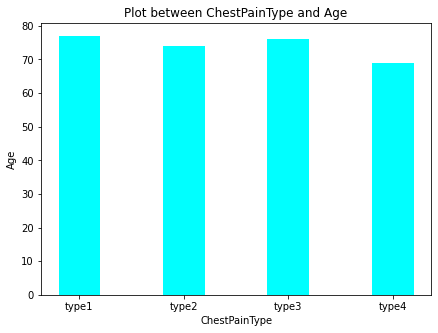

In [250]:
# bar plot between ChestPainType and Cholesterol
fig = plt.figure(figsize = (7,5))
plt.bar(data_frame['ChestPainType'],data_frame['Age'], color ='cyan',
        width = 0.4)
 
plt.xlabel("ChestPainType")
plt.ylabel("Age")
plt.title("Plot between ChestPainType and Age")
plt.show()

#this plot shows younger people show type 4 of chest pains

In [251]:
#classifying heartDisease as Normal and HeartDisease
Normal=data_frame[data_frame['HeartDisease'] == 'Normal']
HeartDisease=data_frame[data_frame['HeartDisease'] == 'HeartDisease']

In [252]:
print(Normal.shape)
print(HeartDisease.shape)

(499, 13)
(526, 13)


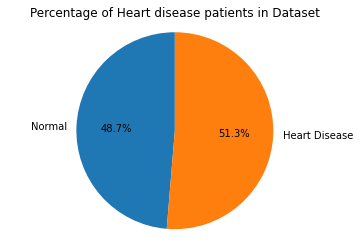

In [253]:
# pie chart for Normal and HeartDisease
plt.pie([len(Normal),len(HeartDisease)], labels=['Normal', 'Heart Disease'],
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Percentage of Heart disease patients in Dataset')
plt.axis('equal')
plt.show()

*plotting countplot with attributes*

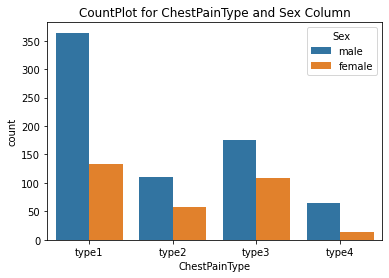

In [254]:
sns.countplot('ChestPainType',data=data_frame,hue='Sex')
plt.title('CountPlot for ChestPainType and Sex Column')
plt.show()

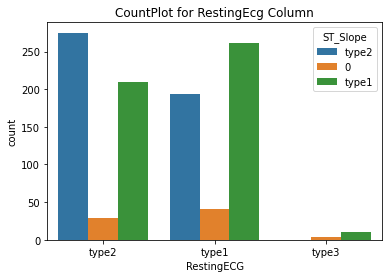

In [255]:
sns.countplot('RestingECG',data=data_frame,hue='ST_Slope')
plt.title('CountPlot for RestingEcg Column')
plt.show()

*plotting catplot with attributes*

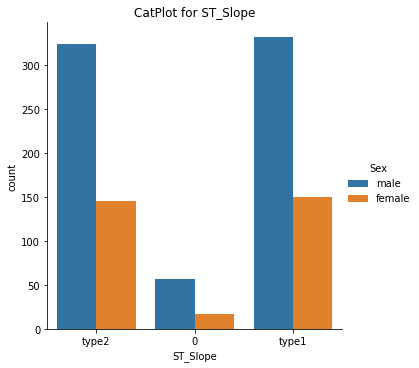

In [256]:
sns.catplot(x="ST_Slope",kind="count",hue="Sex",data=data_frame)
plt.title('CatPlot for ST_Slope')
plt.show()

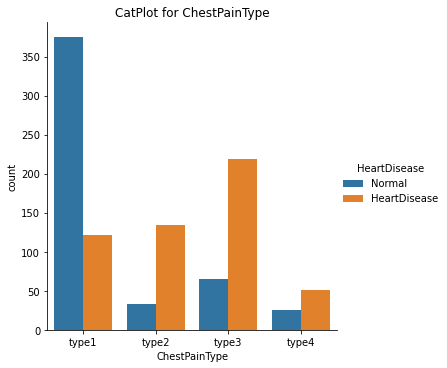

In [257]:
sns.catplot(x="ChestPainType",kind="count",hue="HeartDisease",data=data_frame)
plt.title('CatPlot for ChestPainType')
plt.show()

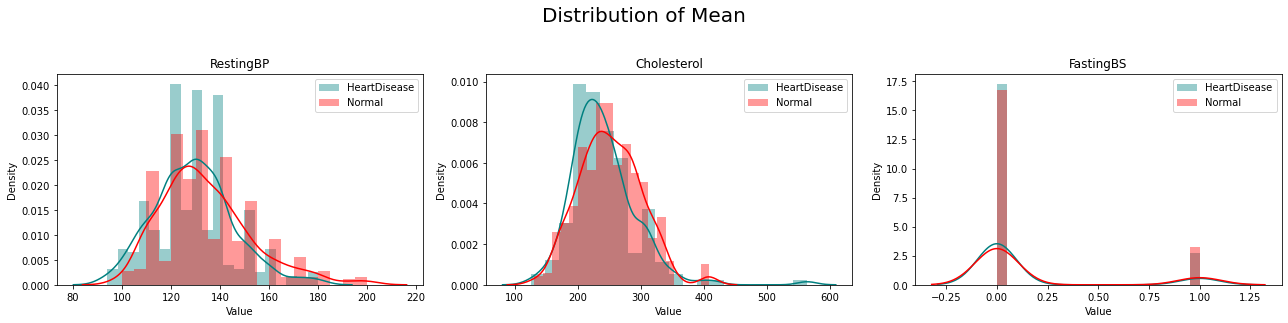

In [258]:
# distribution of mean for three different attributes
# Figure size
fig = plt.figure(figsize = (18,14),tight_layout=True)
# Enumerate starting at 0 to 10, add 1 for subplotting
for i,b in enumerate(list(data_frame.columns[3:6])):
    i = i + 1
    ax = fig.add_subplot(4,3,i)
    
    sns.distplot(data_frame[b][data_frame['HeartDisease'] == 'HeartDisease'],label = 'HeartDisease', color = 'teal', bins = 20,hist = True )
    sns.distplot(data_frame[b][data_frame['HeartDisease'] == 'Normal'],label = 'Normal', color = "r", bins = 20,hist = True)
    
    ax.set_xlabel('Value')    
    ax.set_title(b)
    plt.legend()
plt.suptitle('Distribution of Mean', y=1.04, size=20)
plt.tight_layout()
plt.show()

**MODEL TRAINING**

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [261]:
data_frame = pd.read_csv('/content/drive/MyDrive/Hackathon AIML/heart1.csv')

In [262]:
data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [263]:
data_frame.rename(columns = {'age':'Age','sex':'Sex','cp':'ChestPainType',
                     'trestbps':'RestingBP','chol':'Cholesterol','fbs':'FastingBS','restecg':'RestingECG'
                    ,'thalach':'MaxHR','exang':'ExecrciseAngina','oldpeak':'Oldpeak','slope':'ST_Slope','target':'HeartDisease'}, inplace = True)
data_frame.tail(n=20)
data_frame = data_frame.drop('ca', 1)

Division of DataSet into Training and Testing Data

In [264]:
X_train, X_test, y_train, y_test = train_test_split(data_frame.loc[:,:'ST_Slope'],data_frame['HeartDisease'], test_size=0.33, random_state=42)

USING Decision Tree Classifier AS MODEL

In [265]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [266]:
#generating the model of type DecisionTreeClassifier
#we are fiiting the model for training the data from the datasets
#67.77% of training data and 33.33% of testing data
from sklearn.tree import DecisionTreeClassifier
new_model = DecisionTreeClassifier()
new_model.fit(x_train,y_train)

DecisionTreeClassifier()

MODEL EVALUATION

*model accuracy*

In [267]:
#accuracy of the model is determined over here

prediction=new_model.predict(x_test)
accuracy_model = accuracy_score(y_test,prediction)
print('the accuracy score: ',str(accuracy_model*100))

the accuracy score:  97.34513274336283


In [268]:
#getting the confusion matrix
prediction=new_model.predict(x_test)
cm2=confusion_matrix(y_test,prediction) 
print('confusion matrix')
cm2

confusion matrix


array([[171,   0],
       [  9, 159]])